In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pycaret.nlp import *

In [2]:
df_bg_tmp = pd.read_csv('../datasets/games-cleaned.csv')
df_bg = df_bg_tmp.copy()

In [3]:
bg_nlp = df_bg[['name', 'description']].copy()
bg_nlp = setup(bg_nlp, target = 'description', custom_stopwords = ['player', 'card', 'play', 'game'], session_id=42)

Description,Value
session_id,42
Documents,4609
Vocab Size,17167
Custom Stopwords,True


In [4]:
lda = create_model('lda', num_topics = 6, multi_core = True)
lda_results = assign_model(lda)
lda_results.head()

,name,description,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Dominant_Topic,Perc_Dominant_Topic
0,Pandemic,pandemic several virulent disease break simult...,0.353244,0.001421,0.001413,0.364800,0.106863,0.172258,Topic 3,0.36
1,Carcassonne,draw place tile piece southern french landscap...,0.044900,0.945207,0.002474,0.002463,0.002466,0.002490,Topic 1,0.95
2,Catan,formerly try dominant settlement city road tur...,0.503359,0.493226,0.000803,0.000808,0.000806,0.000999,Topic 0,0.50
3,7 Wonders,leader great city ancient world gather resourc...,0.678070,0.285858,0.019306,0.013474,0.001651,0.001641,Topic 0,0.68
4,Dominion,parent ruler small pleasant kingdom river ever...,0.343315,0.145287,0.053965,0.001638,0.011347,0.444449,Topic 5,0.44


In [5]:
lda_results['Dominant_Topic'].value_counts()

Topic 0    1423
Topic 1    1024
Topic 5     986
Topic 4     736
Topic 2     251
Topic 3     189
Name: Dominant_Topic, dtype: int64

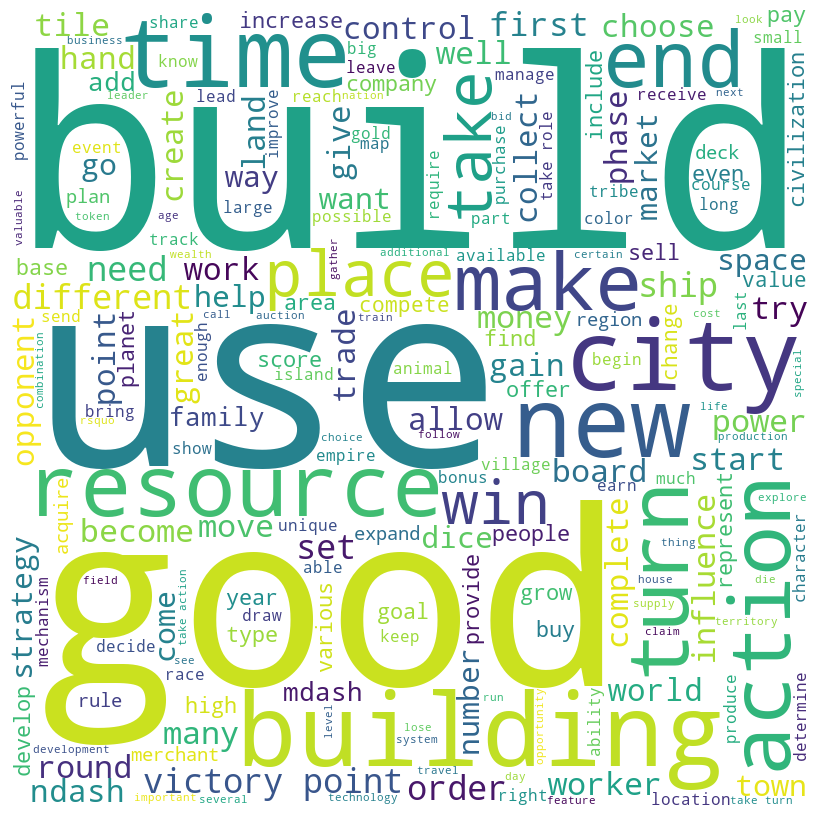

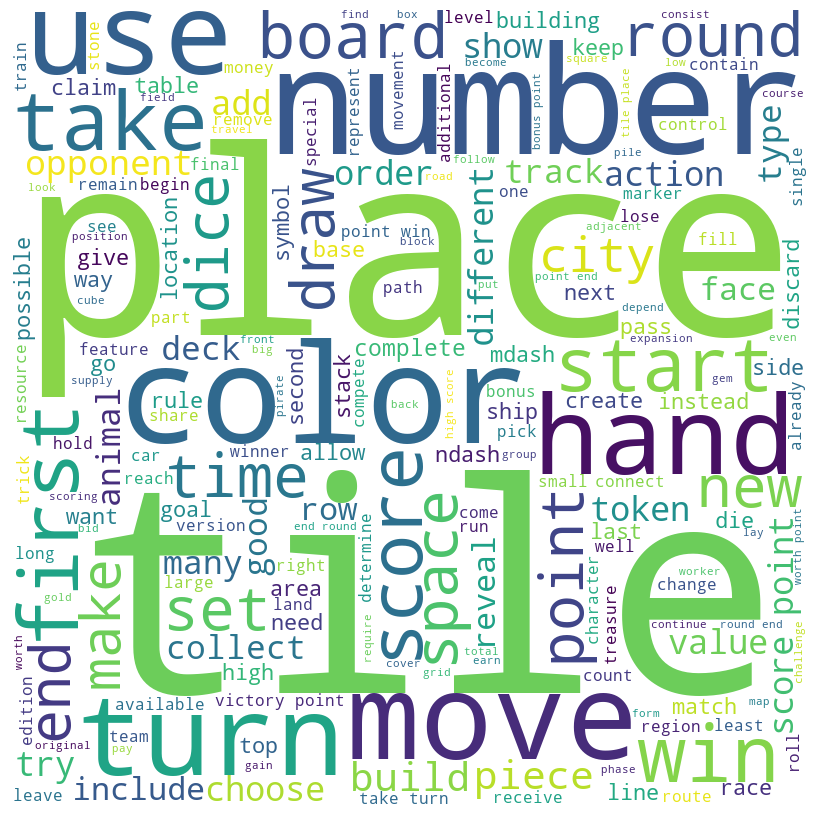

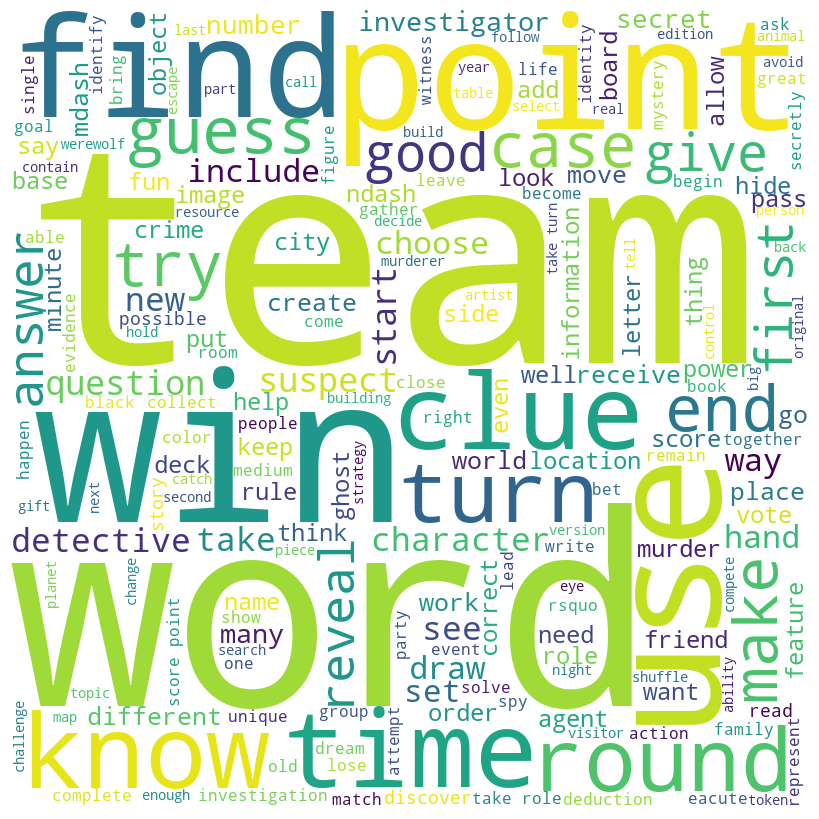

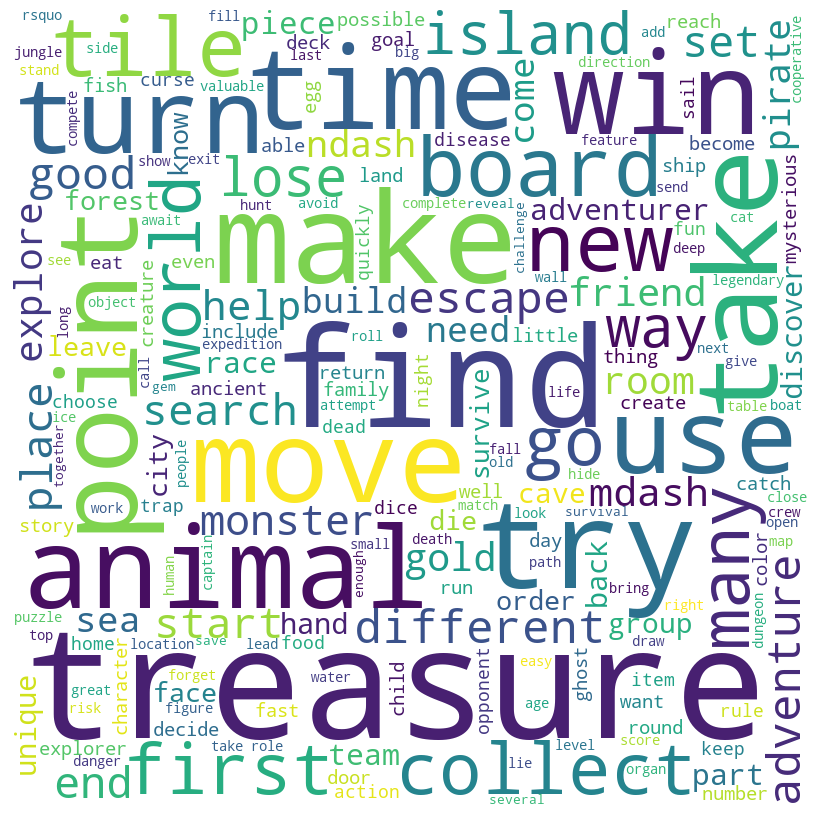

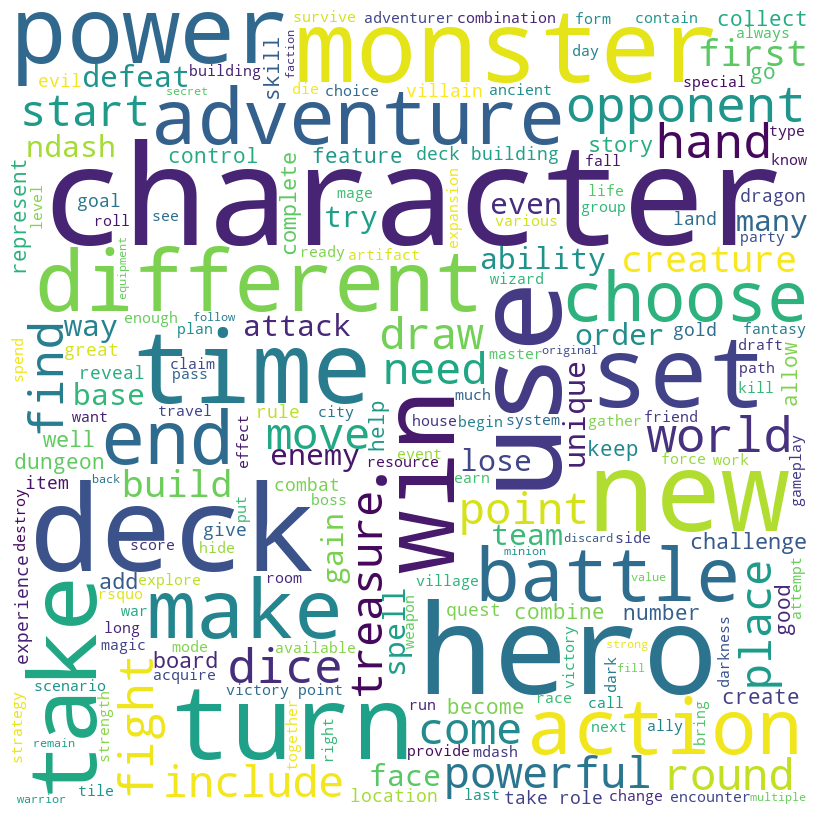

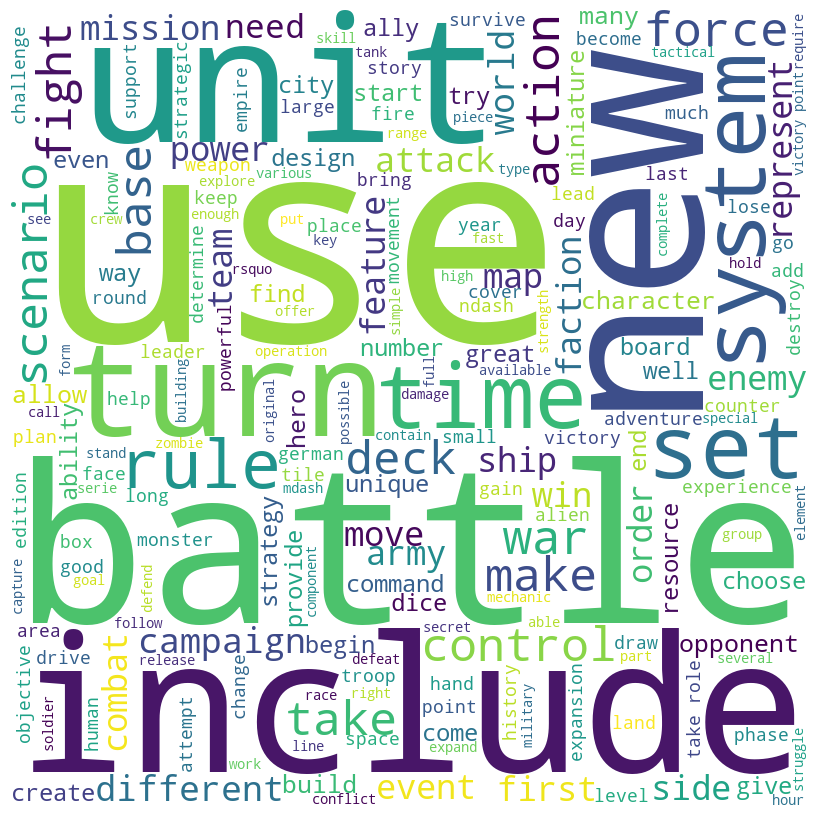

In [6]:
for i in range(6):
    plot_model(lda, plot = 'wordcloud', topic_num=f'Topic {i}')

In [8]:
evaluate_model(lda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Frequency Plot', 'freque…